In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd

import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import Hodograph, SkewT
from metpy.units import units

import xarray as xr
from netCDF4 import Dataset
import xarray as xr
from wrf import to_np, getvar
import numpy as np
import wrf

In [51]:
date='21'
hour='07'

file0_wrf_d02 = f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_ens_2/wrfout_d01_2017-01-{date}_{hour}:00:00"
#file1_wrf_d02 = f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_muregion_warm_1/wrfout_d01_2017-01-{date}_{hour}:00:00"
#file2_wrf_d02 = f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_muregion_warm_2/wrfout_d01_2017-01-{date}_{hour}:00:00"

#file3_wrf_d02 = f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_gomplume_cool_1/wrfout_d01_2017-01-{date}_{hour}:00:00"
#file4_wrf_d02 = f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_gomplume_warm_1/wrfout_d01_2017-01-{date}_{hour}:00:00"
#file5_wrf_d02 = f"/glade/scratch/molina/WRF_HYSPLIT_proj/wrf4km_sst_gomplume_warm_2/wrfout_d01_2017-01-{date}_{hour}:00:00"

In [52]:
ncfile0 = Dataset(file0_wrf_d02)
#ncfile1 = Dataset(file1_wrf_d02)
#ncfile2 = Dataset(file2_wrf_d02)
xrfile0 = xr.open_dataset(file0_wrf_d02)
#xrfile1 = xr.open_dataset(file1_wrf_d02)
#xrfile2 = xr.open_dataset(file2_wrf_d02)

#ncfile3 = Dataset(file3_wrf_d02)
#ncfile4 = Dataset(file4_wrf_d02)
#ncfile5 = Dataset(file5_wrf_d02)
#xrfile3 = xr.open_dataset(file3_wrf_d02)
#xrfile4 = xr.open_dataset(file4_wrf_d02)
#xrfile5 = xr.open_dataset(file5_wrf_d02)

In [53]:
first=430
secon=360
print(xrfile0.T[0,0,first,secon].coords['XLAT'].values)
print(xrfile0.T[0,0,first,secon].coords['XLONG'].values)

30.982136
-87.60083


In [54]:
#pressure
p0 = ((xrfile0['P']+xrfile0['PB'])*0.01)[0,:,first,secon]
#p1 = ((xrfile1['P']+xrfile1['PB'])*0.01)[0,:,first,secon]
#p2 = ((xrfile2['P']+xrfile2['PB'])*0.01)[0,:,first,secon]
#p3 = ((xrfile3['P']+xrfile3['PB'])*0.01)[0,:,first,secon]
#p4 = ((xrfile4['P']+xrfile4['PB'])*0.01)[0,:,first,secon]
#p5 = ((xrfile5['P']+xrfile5['PB'])*0.01)[0,:,first,secon]

In [55]:
#temperature
t0 = wrf.tk((xrfile0['P']+xrfile0['PB']),xrfile0['T']+300)[0,:,first,secon]
#t1 = wrf.tk((xrfile1['P']+xrfile1['PB']),xrfile1['T']+300)[0,:,first,secon]
#t2 = wrf.tk((xrfile2['P']+xrfile2['PB']),xrfile2['T']+300)[0,:,first,secon]
#t3 = wrf.tk((xrfile3['P']+xrfile3['PB']),xrfile3['T']+300)[0,:,first,secon]
#t4 = wrf.tk((xrfile4['P']+xrfile4['PB']),xrfile4['T']+300)[0,:,first,secon]
#t5 = wrf.tk((xrfile5['P']+xrfile5['PB']),xrfile5['T']+300)[0,:,first,secon]

In [56]:
#dew point temperature
td0 = wrf.td((xrfile0['P']+xrfile0['PB'])*0.01,xrfile0['QVAPOR'])[0,:,first,secon]
#td1 = wrf.td((xrfile1['P']+xrfile1['PB'])*0.01,xrfile1['QVAPOR'])[0,:,first,secon]
#td2 = wrf.td((xrfile2['P']+xrfile2['PB'])*0.01,xrfile2['QVAPOR'])[0,:,first,secon]#

#td3 = wrf.td((xrfile3['P']+xrfile3['PB'])*0.01,xrfile3['QVAPOR'])[0,:,first,secon]
#td4 = wrf.td((xrfile4['P']+xrfile4['PB'])*0.01,xrfile4['QVAPOR'])[0,:,first,secon]
#td5 = wrf.td((xrfile5['P']+xrfile5['PB'])*0.01,xrfile5['QVAPOR'])[0,:,first,secon]

In [57]:
wspd0, wdir0 =  getvar(ncfile0, "wspd_wdir", units="kt")
#wspd1, wdir1 =  getvar(ncfile1, "wspd_wdir", units="kt")
#wspd2, wdir2 =  getvar(ncfile2, "wspd_wdir", units="kt")
#wspd3, wdir3 =  getvar(ncfile3, "wspd_wdir", units="kt")
#wspd4, wdir4 =  getvar(ncfile4, "wspd_wdir", units="kt")
#wspd5, wdir5 =  getvar(ncfile5, "wspd_wdir", units="kt")

wspd0 = wspd0[:,first,secon]
#wspd1 = wspd1[:,first,secon]
#wspd2 = wspd2[:,first,secon]
#wspd3 = wspd3[:,first,secon]
#wspd4 = wspd4[:,first,secon]
#wspd5 = wspd5[:,first,secon]

wdir0 = wdir0[:,first,secon]
#wdir1 = wdir1[:,first,secon]
#wdir2 = wdir2[:,first,secon]
#wdir3 = wdir3[:,first,secon]
#wdir4 = wdir4[:,first,secon]
#wdir5 = wdir5[:,first,secon]

In [58]:
u0, v0 = mpcalc.wind_components(wspd0.values, np.radians(wdir0.values))
#u1, v1 = mpcalc.wind_components(wspd1.values, np.radians(wdir1.values))
#u2, v2 = mpcalc.wind_components(wspd2.values, np.radians(wdir2.values))
#u3, v3 = mpcalc.wind_components(wspd3.values, np.radians(wdir3.values))
#u4, v4 = mpcalc.wind_components(wspd4.values, np.radians(wdir4.values))
#u5, v5 = mpcalc.wind_components(wspd5.values, np.radians(wdir5.values))

In [59]:
lcl_pressure0, lcl_temperature0 = mpcalc.lcl(p0.values[0]*units.hPa, (t0.values[0]-273.17)*units.degC, td0.values[0]*units.degC)
parcel_prof0 = mpcalc.parcel_profile(p0.values*units.hPa, (t0.values[0]-273.17)*units.degC, td0.values[0]*units.degC).to('degC')

#lcl_pressure1, lcl_temperature1 = mpcalc.lcl(p1.values[0]*units.hPa, (t1.values[0]-273.17)*units.degC, td1.values[0]*units.degC)
#parcel_prof1 = mpcalc.parcel_profile(p1.values*units.hPa, (t1.values[0]-273.17)*units.degC, td1.values[0]*units.degC).to('degC')

#lcl_pressure2, lcl_temperature2 = mpcalc.lcl(p2.values[0]*units.hPa, (t2.values[0]-273.17)*units.degC, td2.values[0]*units.degC)
#parcel_prof2 = mpcalc.parcel_profile(p2.values*units.hPa, (t2.values[0]-273.17)*units.degC, td2.values[0]*units.degC).to('degC')

#lcl_pressure3, lcl_temperature3 = mpcalc.lcl(p3.values[0]*units.hPa, (t3.values[0]-273.17)*units.degC, td3.values[0]*units.degC)
#parcel_prof3 = mpcalc.parcel_profile(p3.values*units.hPa, (t3.values[0]-273.17)*units.degC, td3.values[0]*units.degC).to('degC')

#lcl_pressure4, lcl_temperature4 = mpcalc.lcl(p4.values[0]*units.hPa, (t4.values[0]-273.17)*units.degC, td4.values[0]*units.degC)
#parcel_prof4 = mpcalc.parcel_profile(p4.values*units.hPa, (t4.values[0]-273.17)*units.degC, td4.values[0]*units.degC).to('degC')

#lcl_pressure5, lcl_temperature5 = mpcalc.lcl(p5.values[0]*units.hPa, (t5.values[0]-273.17)*units.degC, td5.values[0]*units.degC)
#parcel_prof5 = mpcalc.parcel_profile(p5.values*units.hPa, (t5.values[0]-273.17)*units.degC, td5.values[0]*units.degC).to('degC')

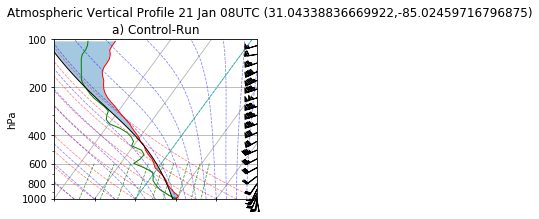

In [13]:
fig = plt.figure(figsize=(8., 10.))

plt.suptitle(f"Atmospheric Vertical Profile {date} Jan {hour}UTC ({xrfile0.T[0,0,first,secon].coords['XLAT'].values},{xrfile0.T[0,0,first,secon].coords['XLONG'].values})", x=0.5, y=0.925, fontsize=12)

gs = fig.add_gridspec(3, 2)

a = u"\u00b0"
"""
#muregion2w
skew1 = fig.add_subplot(gs[2, 0], projection='skewx', rotation=30)
skew1 = SkewT(fig, rotation=30, subplot=skew1)
skew1.plot(p2, t2-273.15, 'r', linewidth=1)
skew1.plot(p2, td2, 'g', linewidth=1)
skew1.plot_barbs(p2[::2], u2[::2], v2[::2], length=5, zorder=10)
skew1.ax.set_ylim(1000, 100)
skew1.ax.set_xlim(-40, 60)
#skew1.plot(lcl_pressure2, lcl_temperature2, 'ko', markerfacecolor='black')
skew1.plot(p2, parcel_prof2, 'k', linewidth=1)
skew1.shade_cin(p2.values*units.hPa, (t2.values-273.17)*units.degC, parcel_prof2)
skew1.shade_cape(p2.values*units.hPa, (t2.values-273.17)*units.degC, parcel_prof2)
skew1.ax.axvline(0, color='c', linestyle='--', linewidth=0.75)
skew1.plot_dry_adiabats(linewidth=0.75)
skew1.plot_moist_adiabats(linewidth=0.75)
skew1.plot_mixing_lines(linewidth=0.75)
#ax_hod1 = inset_axes(skew1.ax, '40%', '40%', loc=1)
#h1 = Hodograph(ax_hod1, component_range=80.)
#h1.add_grid(increment=20)
#h1.plot_colormapped(u2, v2, wspd2)
skew1.ax.set_title("e) Peak MU (+2"+a+"C)", fontsize=12)
skew1.ax.set_ylabel("hPa")
skew1.ax.set_yticks([1000,800,600,400,200,100])
skew1.ax.set_xticks([-40,-20,0,20,40,60])


#muregion1w
skew2 = fig.add_subplot(gs[1, 0], projection='skewx', rotation=30)
skew2 = SkewT(fig, rotation=30, subplot=skew2)
skew2.plot(p1, t1-273.15, 'r', linewidth=1)
skew2.plot(p1, td1, 'g', linewidth=1)
skew2.plot_barbs(p1[::2], u1[::2], v1[::2], length=5, zorder=10)
skew2.ax.set_ylim(1000, 100)
skew2.ax.set_xlim(-40, 60)
#skew2.plot(lcl_pressure1, lcl_temperature1, 'ko', markerfacecolor='black')
skew2.plot(p1, parcel_prof1, 'k', linewidth=1)
skew2.shade_cin(p1.values*units.hPa, (t1.values-273.17)*units.degC, parcel_prof1)
skew2.shade_cape(p1.values*units.hPa, (t1.values-273.17)*units.degC, parcel_prof1)
skew2.ax.axvline(0, color='c', linestyle='--', linewidth=0.75)
skew2.plot_dry_adiabats(linewidth=0.75)
skew2.plot_moist_adiabats(linewidth=0.75)
skew2.plot_mixing_lines(linewidth=0.75)
#ax_hod2 = inset_axes(skew2.ax, '40%', '40%', loc=1)
#h2 = Hodograph(ax_hod2, component_range=80.)
#h2.add_grid(increment=20)
#h2.plot_colormapped(u1, v1, wspd1)
skew2.ax.tick_params(axis='x',direction='inout',bottom=True,labelbottom=False)
skew2.ax.set_title("c) Peak MU (+1"+a+"C)", fontsize=12)
skew2.ax.set_xlabel(None)
skew2.ax.set_ylabel("hPa")
skew2.ax.set_yticks([1000,800,600,400,200,100])
skew2.ax.set_xticks([-40,-20,0,20,40,60])
"""

#controlrun
skew0 = fig.add_subplot(gs[0, 0], projection='skewx', rotation=30)
skew0 = SkewT(fig, rotation=30, subplot=skew0)
skew0.plot(p0, t0-273.15, 'r', linewidth=1)
skew0.plot(p0, td0, 'g', linewidth=1)
skew0.plot_barbs(p0[::2], u0[::2], v0[::2], length=5, zorder=10)
skew0.ax.set_ylim(1000, 100)
skew0.ax.set_xlim(-40, 60)
#skew0.plot(lcl_pressure0, lcl_temperature0, 'ko', markerfacecolor='black')
skew0.plot(p0, parcel_prof0, 'k', linewidth=1)
skew0.shade_cin(p0.values*units.hPa, (t0.values-273.17)*units.degC, parcel_prof0)
skew0.shade_cape(p0.values*units.hPa, (t0.values-273.17)*units.degC, parcel_prof0)
skew0.ax.axvline(0, color='c', linestyle='--', linewidth=0.75)
skew0.plot_dry_adiabats(linewidth=0.75)
skew0.plot_moist_adiabats(linewidth=0.75)
skew0.plot_mixing_lines(linewidth=0.75)
#ax_hod0 = inset_axes(skew0.ax, '40%', '40%', loc=1)
#h0 = Hodograph(ax_hod0, component_range=80.)
#h0.add_grid(increment=20)
#h0.plot_colormapped(u0, v0, wspd0)
skew0.ax.tick_params(axis='x',direction='inout',bottom=True,labelbottom=False)
skew0.ax.set_title("a) Control-Run", fontsize=12)
skew0.ax.set_xlabel(None)
skew0.ax.set_ylabel("hPa")
skew0.ax.set_yticks([1000,800,600,400,200,100])
skew0.ax.set_xticks([-40,-20,0,20,40,60])

"""
#gomplume1c
skew1 = fig.add_subplot(gs[0, 1], projection='skewx', rotation=30)
skew1 = SkewT(fig, rotation=30, subplot=skew1)
skew1.plot(p3, t3-273.15, 'r', linewidth=1)
skew1.plot(p3, td3, 'g', linewidth=1)
skew1.plot_barbs(p3[::2], u3[::2], v3[::2], length=5, zorder=10)
skew1.ax.set_ylim(1000, 100)
skew1.ax.set_xlim(-40, 60)
#skew1.plot(lcl_pressure3, lcl_temperature3, 'ko', markerfacecolor='black')
skew1.plot(p3, parcel_prof3, 'k', linewidth=1)
skew1.shade_cin(p3.values*units.hPa, (t3.values-273.17)*units.degC, parcel_prof3)
skew1.shade_cape(p3.values*units.hPa, (t3.values-273.17)*units.degC, parcel_prof3)
skew1.ax.axvline(0, color='c', linestyle='--', linewidth=0.75)
skew1.plot_dry_adiabats(linewidth=0.75)
skew1.plot_moist_adiabats(linewidth=0.75)
skew1.plot_mixing_lines(linewidth=0.75)
#ax_hod3 = inset_axes(skew1.ax, '40%', '40%', loc=1)
#h3 = Hodograph(ax_hod3, component_range=80.)
#h3.add_grid(increment=20)
#h3.plot_colormapped(u3, v3, wspd3)
skew1.ax.tick_params(axis='x',direction='inout',bottom=True,labelbottom=False)
skew1.ax.set_title("b) NE GoM (-1"+a+"C)", fontsize=12)
skew1.ax.set_xlabel(None)
skew1.ax.set_ylabel(None)
skew1.ax.set_yticks([1000,800,600,400,200,100])
skew1.ax.set_xticks([-40,-20,0,20,40,60])


#gomplume1w
skew2 = fig.add_subplot(gs[1, 1], projection='skewx', rotation=30)
skew2 = SkewT(fig, rotation=30, subplot=skew2)
skew2.plot(p4, t4-273.15, 'r', linewidth=1)
skew2.plot(p4, td4, 'g', linewidth=1)
skew2.plot_barbs(p4[::2], u4[::2], v4[::2], length=5, zorder=10)
skew2.ax.set_ylim(1000, 100)
skew2.ax.set_xlim(-40, 60)
#skew2.plot(lcl_pressure4, lcl_temperature4, 'ko', markerfacecolor='black')
skew2.plot(p4, parcel_prof4, 'k', linewidth=1)
skew2.shade_cin(p4.values*units.hPa, (t4.values-273.17)*units.degC, parcel_prof4)
skew2.shade_cape(p4.values*units.hPa, (t4.values-273.17)*units.degC, parcel_prof4)
skew2.ax.axvline(0, color='c', linestyle='--', linewidth=0.75)
skew2.plot_dry_adiabats(linewidth=0.75)
skew2.plot_moist_adiabats(linewidth=0.75)
skew2.plot_mixing_lines(linewidth=0.75)
#ax_hod2 = inset_axes(skew2.ax, '40%', '40%', loc=1)
#h2 = Hodograph(ax_hod2, component_range=80.)
#h2.add_grid(increment=20)
#h2.plot_colormapped(u4, v4, wspd4)
skew2.ax.tick_params(axis='x',direction='inout',bottom=True,labelbottom=False)
skew2.ax.set_title("d) NE GoM (+1"+a+"C)", fontsize=12)
skew2.ax.set_xlabel(None)
skew2.ax.set_ylabel(None)
skew2.ax.set_yticks([1000,800,600,400,200,100])
skew2.ax.set_xticks([-40,-20,0,20,40])


#gomplume2w
skew0 = fig.add_subplot(gs[2, 1], projection='skewx', rotation=30)
skew0 = SkewT(fig, rotation=30, subplot=skew0)
skew0.plot(p5, t5-273.15, 'r', linewidth=1.)
skew0.plot(p5, td5, 'g', linewidth=1.)
skew0.plot_barbs(p5[::2], u5[::2], v5[::2], length=5, zorder=10)
skew0.ax.set_ylim(1000, 100)
skew0.ax.set_xlim(-40, 60)
#skew0.plot(lcl_pressure5, lcl_temperature5, 'ko', markerfacecolor='black', linewidth=1.)
skew0.plot(p5, parcel_prof5, 'k', linewidth=1.)
skew0.shade_cin(p5.values*units.hPa, (t5.values-273.17)*units.degC, parcel_prof5)
skew0.shade_cape(p5.values*units.hPa, (t5.values-273.17)*units.degC, parcel_prof5)
skew0.ax.axvline(0, color='c', linestyle='--', linewidth=0.75)
skew0.plot_dry_adiabats(linewidths=0.75)
skew0.plot_moist_adiabats(linewidths=0.75)
skew0.plot_mixing_lines(linewidths=0.75)
#ax_hod0 = inset_axes(skew0.ax, '40%', '40%', loc=1)
#h0 = Hodograph(ax_hod0, component_range=80.)
#h0.add_grid(increment=20)
#h0.plot_colormapped(u5, v5, wspd5, intervals=np.array([10]), colors=np.array(["k"]))
skew0.ax.set_ylabel(None)
skew0.ax.set_title("f) NE GoM (+2"+a+"C)", fontsize=12)
skew0.ax.set_yticks([1000,800,600,400,200,100])
skew0.ax.set_xticks([-40,-20,0,20,40])


"""
#plt.savefig('/glade/work/molina/DATA/temp_figs/mwr2019_fig13.png', bbox_inches='tight', dpi=200)
plt.show()
plt.close()

In [93]:
print(t0[0:10].mean()-273.15,td0[0:5].mean())
print(t1[0:10].mean()-273.15,td1[0:5].mean())
print(t2[0:10].mean()-273.15,td2[0:5].mean())

<xarray.DataArray 'tk' ()>
array(18.04696045) <xarray.DataArray 'td' ()>
array(17.959705, dtype=float32)
<xarray.DataArray 'tk' ()>
array(17.99801025) <xarray.DataArray 'td' ()>
array(18.458931, dtype=float32)
<xarray.DataArray 'tk' ()>
array(17.9230896) <xarray.DataArray 'td' ()>
array(18.578808, dtype=float32)


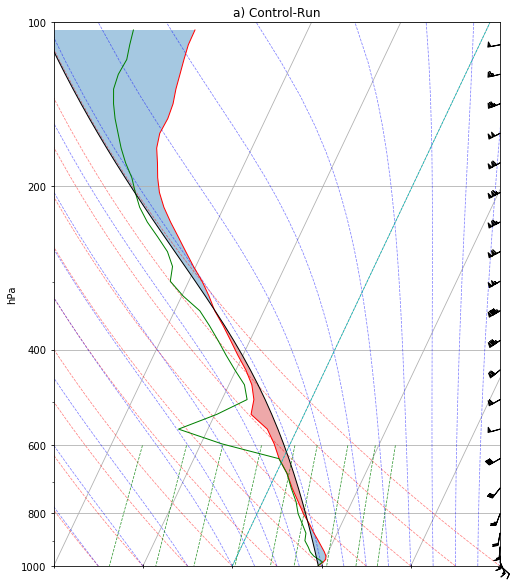

In [60]:
fig = plt.figure(figsize=(8., 10.))

#skew0 = fig.add_subplot(gs[0, 0], projection='skewx', rotation=30)
skew0 = SkewT(fig, rotation=30)
skew0.plot(p0, t0-273.15, 'r', linewidth=1)
skew0.plot(p0, td0, 'g', linewidth=1)
skew0.plot_barbs(p0[::2], u0[::2], v0[::2], length=5, zorder=10)
skew0.ax.set_ylim(1000, 100)
skew0.ax.set_xlim(-40, 60)
#skew0.plot(lcl_pressure0, lcl_temperature0, 'ko', markerfacecolor='black')
skew0.plot(p0, parcel_prof0, 'k', linewidth=1)
skew0.shade_cin(p0.values*units.hPa, (t0.values-273.17)*units.degC, parcel_prof0)
skew0.shade_cape(p0.values*units.hPa, (t0.values-273.17)*units.degC, parcel_prof0)
skew0.ax.axvline(0, color='c', linestyle='--', linewidth=0.75)
skew0.plot_dry_adiabats(linewidth=0.75)
skew0.plot_moist_adiabats(linewidth=0.75)
skew0.plot_mixing_lines(linewidth=0.75)
#ax_hod0 = inset_axes(skew0.ax, '40%', '40%', loc=1)
#h0 = Hodograph(ax_hod0, component_range=80.)
#h0.add_grid(increment=20)
#h0.plot_colormapped(u0, v0, wspd0)
skew0.ax.tick_params(axis='x',direction='inout',bottom=True,labelbottom=False)
skew0.ax.set_title("a) Control-Run", fontsize=12)
skew0.ax.set_xlabel(None)
skew0.ax.set_ylabel("hPa")
skew0.ax.set_yticks([1000,800,600,400,200,100])
skew0.ax.set_xticks([-40,-20,0,20,40,60])


plt.show()